# Tech Challenge - Fase 2 (Machine Learning and Time Series)
## Integrantes do grupo 43

* **Gabriel Tomaz**
* **Meuriam Silva**
* **Pedro Costa**
* **Thiago Aragão**

**Importação das bibliotecas**

Importação das bibliotecas básicas para importar a base de dados em um Dataframe e apresentar gráficos, as outras bibliotecas estão sendo importadas conforme a necessidade na execução do notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importação da base de dados**

Os dados foram importados do [site Investing](https://br.investing.com/indices/bovespa-historical-data) usando o método pd.read_csv. A coluna de data foi identificada no parâmetro "parse_dates" e as colunas de valores com os milhares separados por pontos e os decimais por vírgulas.

In [2]:
df = pd.read_csv('/content/dados_historicos.csv', parse_dates=['Data'], thousands='.', decimal=',')
df.head()

<ipython-input-2-31e54afb7a61>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/dados_historicos.csv', parse_dates=['Data'], thousands='.', decimal=',')


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-07-26,127492,125964,127700,125953,"8,27M","1,22%"
1,2024-07-25,125954,126423,126423,125626,"7,13B","-0,37%"
2,2024-07-24,126423,126596,126823,126218,"7,30B","-0,13%"
3,2024-07-23,126590,127860,127860,126530,"7,02B","-0,99%"
4,2024-07-22,127860,127616,128151,127456,"6,10B","0,19%"


**Analise inicial da base de dados**

* **shape:** retorna uma tupla com as dimensões do DataFrame, onde o primeiro valor representa o número de linhas e o segundo valor representa o número de colunas.
* **info:** exibe o número total de linhas, o número de colunas, o nome de cada coluna, o tipo de dados de cada coluna, e a quantidade de valores não nulos em cada coluna.

In [3]:
df.shape

(3610, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      3610 non-null   datetime64[ns]
 1   Último    3610 non-null   int64         
 2   Abertura  3610 non-null   int64         
 3   Máxima    3610 non-null   int64         
 4   Mínima    3610 non-null   int64         
 5   Vol.      3609 non-null   object        
 6   Var%      3610 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 197.5+ KB


**Renomear as colunas**

* **Último:** Representa o último preço pelo qual o índice foi negociado antes do encerramento do mercado naquele dia.

* **Abertura:** Representa o primeiro preço pelo qual o índice foi negociado quando o mercado abriu naquele dia.

* **Máxima:** Indica o ponto máximo de preço alcançado durante as negociações daquele dia.

* **Mínima:** Indica o ponto mínimo de preço alcançado durante as negociações daquele dia.

* **Vol. (Volume):** Refere-se ao número total de ações ou contratos negociados.

* **Var% (Variação Percentual):** Esta coluna mostra a variação percentual do índice em relação ao fechamento do dia anterior

In [5]:
df = df.rename(
    columns={
        'Data': 'DATA',
        'Vol.': 'VOLUME',
        'Último': 'ULTIMO',
        'Máxima': 'MAXIMA',
        'Mínima': 'MINIMA',
        'Abertura': 'ABERTURA',
        'Var%': 'VARIACAO_PERCENTUAL'
        }
    )
df.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO_PERCENTUAL
0,2024-07-26,127492,125964,127700,125953,"8,27M","1,22%"
1,2024-07-25,125954,126423,126423,125626,"7,13B","-0,37%"
2,2024-07-24,126423,126596,126823,126218,"7,30B","-0,13%"
3,2024-07-23,126590,127860,127860,126530,"7,02B","-0,99%"
4,2024-07-22,127860,127616,128151,127456,"6,10B","0,19%"


**Funções para fazer converção de valores na base de dados**
* **converter_volume:** Recebe uma string por parâmetro e faz a conversão para o tipo int;
* **converter_percentage:** Recebe uma string por parâmetro e faz a conversão para o tipo float

In [6]:
def converter_volume(volume):
  if pd.isna(volume):
    return 0
  if not volume:
    return 0
  if isinstance(volume, (int, float)):
    return int(volume)

  volume = volume.strip().upper().replace(',', '.')

  if volume[-1] == 'K':
    return int(float(volume[:-1]) * 1e3)
  elif volume[-1] == 'M':
    return int(float(volume[:-1]) * 1e6)
  elif volume[-1] == 'B':
    return int(float(volume[:-1]) * 1e9)
  else:
    return int(volume)

def converter_percentage(variacao_percentual):
  if pd.isna(variacao_percentual):
    return np.nan
  if isinstance(variacao_percentual, (int, float)):
    return float(variacao_percentual)

  variacao_percentual = variacao_percentual.strip().replace('%', '').replace(',', '.')

  try:
    return float(variacao_percentual)
  except ValueError:
    return np.nan

**Converter os dados da base**

No código abaixo, as colunas "VOLUME" e "VARIACAO_PERCENTUAL" são convertidas de strings para valores numéricos. A coluna de data é definida como índice e os dados são ordenados em ordem ascendente pelo indice.

In [7]:
df['VOLUME'] = df['VOLUME'].apply(converter_volume)
df['VARIACAO_PERCENTUAL'] = df['VARIACAO_PERCENTUAL'].apply(converter_percentage)
df = df.set_index('DATA')
df = df.sort_index(ascending = True)
df.head()

,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO_PERCENTUAL
DATA,,,,,,
2010-01-04,70045,68587,70081,68587,1660000,2.12
2010-01-05,70240,70046,70595,69928,1980000,0.28
2010-01-06,70729,70236,70937,70016,2240000,0.70
2010-01-07,70451,70723,70723,70045,1550000,-0.39
2010-01-08,70263,70455,70766,70158,1630000,-0.27


**Criação da matriz de correção entre as colunas**

No código abaixo, é criado um DataFrame que contém a matriz de correlação para as colunas "ULTIMO", "ABERTURA", "MAXIMO", "MINIMA", "VOLUME" e "VARIACAO_PERCENTUAL".

In [8]:
correlacao = df[['ULTIMO', 'ABERTURA', 'MAXIMA', 'MINIMA', 'VOLUME', 'VARIACAO_PERCENTUAL']].corr();
correlacao.head()

,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO_PERCENTUAL
ULTIMO,1.000000,0.999017,0.999572,0.999669,0.071624,0.026408
ABERTURA,0.999017,1.000000,0.999601,0.999409,0.072221,-0.015913
MAXIMA,0.999572,0.999601,1.000000,0.999455,0.071264,0.005178
MINIMA,0.999669,0.999409,0.999455,1.000000,0.072542,0.010327
VOLUME,0.071624,0.072221,0.071264,0.072542,1.000000,-0.008054


**Gráfico para melhorar a visualização da matriz de correlação**

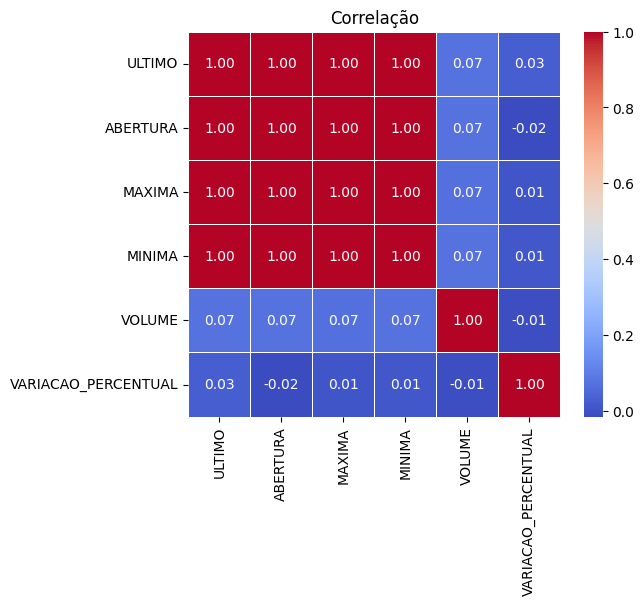

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlação')
plt.show()

**Análise das estatísticas básicas da coluna "Ultimo"**

O método "describe" fornece informações como a contagem de valores, média, desvio padrão, valores mínimo e máximo, além dos quartis (25%, 50%, 75%).

In [10]:
df['ULTIMO'].describe()

count      3610.000000
mean      79656.462050
std       26435.323776
min       37497.000000
25%       56613.750000
50%       69343.500000
75%      105069.250000
max      134194.000000
Name: ULTIMO, dtype: float64

**Histograma referente a coluna "ULTIMO"**

É um gráfico que representa a distribuição de uma variável numérica através de barras. Cada barra mostra a frequência de dados dentro de intervalos específicos, permitindo visualizar a forma, dispersão e tendências dos dados.

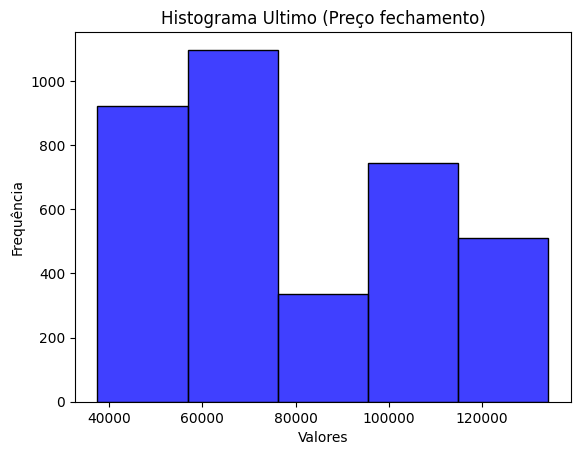

In [11]:
sns.histplot(df['ULTIMO'], bins=5, kde=False, color='blue')

plt.title('Histograma Ultimo (Preço fechamento)')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

**Decomposição**
* Tendência
* Sazonalidade
* Ruído

Entre o início de 2010 e 2016, observamos uma leve tendência de queda. No entanto, a partir de 2016, a tendência mudou rapidamente, com um aumento significativo e contínuo.

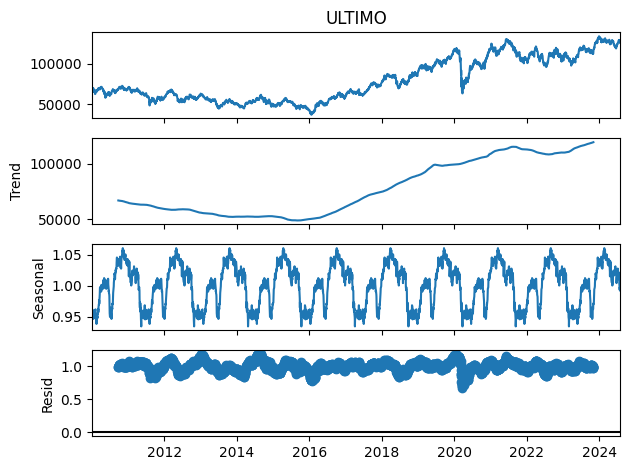

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(df.ULTIMO, model="multiplicative", period=365)
resultado.plot()
plt.show()

**Teste para verificar se a serie é estacionária**

O teste ADF (Augmented Dickey-Fuller) é uma ferramenta estatística usada para verificar a estacionariedade de uma série temporal. Ele testa a hipótese nula de que uma unidade raiz está presente na série, ou seja, que a série não é estacionária. Um valor p menor que um determinado nível de significância (geralmente 0,05) indica que a série é estacionária.

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['ULTIMO'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("A série é estacionária")
else:
    print("A série não é estacionária")

ADF Statistic: -0.7665874633289739
p-value: 0.8287403031406055
A série não é estacionária


**Gráficos ACF e PACF**

ACF (Autocorrelation Function): Ajuda a identificar a ordem do modelo de média móvel (
𝑞
q). Picos significativos na ACF indicam que você deve considerar um termo MA correspondente.

PACF (Partial Autocorrelation Function): Ajuda a identificar a ordem do modelo autorregressivo (
𝑝
p). Picos significativos na PACF indicam que você deve considerar um termo AR correspondente.

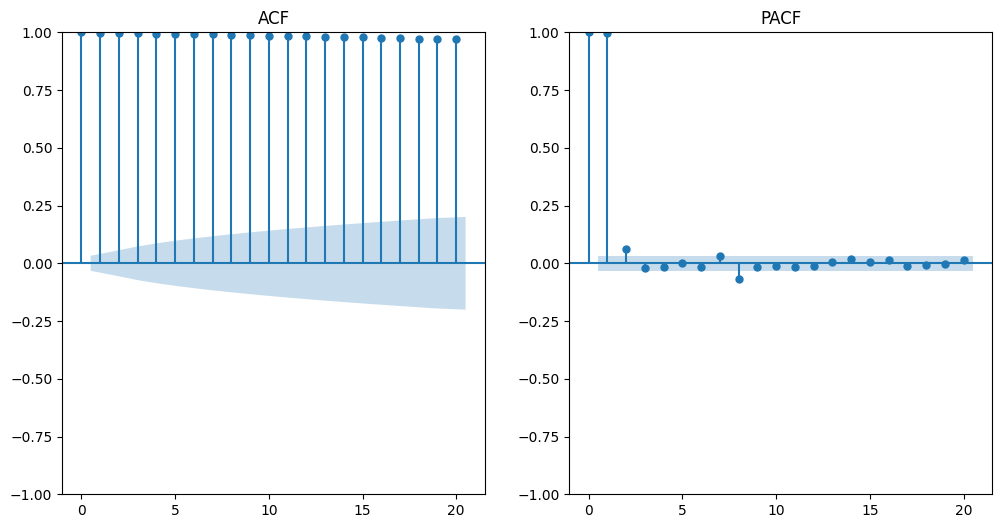

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['ULTIMO'], lags=20, ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(df['ULTIMO'], lags=20, ax=plt.gca())
plt.title('PACF')

plt.show()

**Novo Dataframe**

Criação de um DataFrame com duas colunas: "DATA" e "ULTIMO". Em seguida, as colunas foram renomeadas para "ds" e "y".

In [15]:
df_novo = df.reset_index()[['DATA', 'ULTIMO']]
df_novo = df_novo.rename(columns={'DATA':'ds','ULTIMO':'y'})

**Divisão da Base de Dados em Conjuntos de Treinamento e Teste**

Os dados de 01/01/2010 a 21/07/2024 serão utilizados para treinar os modelos. Em seguida, validaremos o desempenho dos modelos utilizando os dados de teste.

In [16]:
treino = df_novo.loc[df_novo['ds'] <= '2024-07-21']
teste = df_novo.loc[(df_novo['ds'] >= '2024-07-22') & (df_novo['ds'] <= '2024-07-26')]

**Funções para calcular e apresentar as metricas de avaliação dos modelos**

* **mean_absolute_error (MAE):** Calcula a média das diferenças absolutas entre os valores previstos e os valores reais. Mede o erro médio em unidades da variável de previsão.

* **mean_squared_error (MSE):** Calcula a média dos quadrados das diferenças entre os valores previstos e os valores reais. Penaliza erros maiores mais fortemente do que o MAE, e é sensível a outliers.

* **mean_absolute_percentage_error (MAPE):** Mede o erro médio percentual entre os valores previstos e os valores reais. Expressa o erro como uma porcentagem, facilitando a comparação de desempenho em diferentes escalas.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def calculate_metrics(y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)
    return mae, mse, mape

def print_metrics(metrics):
    mae, mse, mape = metrics
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")

**Modelo ARIMA**

O código abaixo realizará o treinamento com o modelo ARIMA e identificará os melhores parâmetros (p, d e q) para ajustar o ARIMA aos dados disponíveis.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Testando diferentes combinações de p, d, q
melhor_aic = np.inf
melhor_order = None

p = 1  # ordem da parte autorregressiva
d = 1  # número de diferenciações
q = 1  # ordem da média móvel

for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                arima_model = ARIMA(treino['y'], order=(p, d, q))
                arima_model_fit = arima_model.fit()
                aic = arima_model_fit.aic
                if aic < melhor_aic:
                    melhor_aic = aic
                    melhor_order = (p, d, q)
            except:
                continue

p = melhor_order[0]
d = melhor_order[1]
q = melhor_order[2]

print(f'Melhores parâmetros: p={p}, d={d}, q={q}')

Melhores parâmetros: p=2, d=1, q=2


**Treinando o ARIMA com a base de dados de treino e os melhores parâmetros**

In [19]:
arima_model = ARIMA(treino['y'], order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(teste))

print(arima_forecast)

3605    127598.683167
3606    127569.932109
3607    127627.320987
3608    127559.344682
3609    127622.697481
Name: predicted_mean, dtype: float64


**Metricas do ARIMA**

In [20]:
metrics_arima = calculate_metrics(teste['y'], arima_forecast)
print("Metricas ARIMA:")
print_metrics(metrics_arima)

Metricas ARIMA:
MAE: 836.32
MSE: 1014631.17
MAPE: 0.66


**Criação do dataframe para apresentar o gráfico do inicio do dia 01/07/2024 a 26/07/2024**

In [21]:
data = pd.date_range(start= teste['ds'].min(), end=teste['ds'].max(), freq='B')
arima_forecast_df = pd.DataFrame({'ds': data, 'previsao': arima_forecast})
arima_forecast_df = df_novo.loc[df_novo['ds'] >= '2024-07-01'].merge(arima_forecast_df, how='left')
arima_forecast_df.tail()

,ds,y,previsao
15,2024-07-22,127860,127598.683167
16,2024-07-23,126590,127569.932109
17,2024-07-24,126423,127627.320987
18,2024-07-25,125954,127559.344682
19,2024-07-26,127492,127622.697481


In [22]:
def converter_para_milhar(x, pos):
    return f'{x*1e-3:.0f}k'

**Gráfico apresentando os valores reais e o previsto pelo modelo ARIMA**

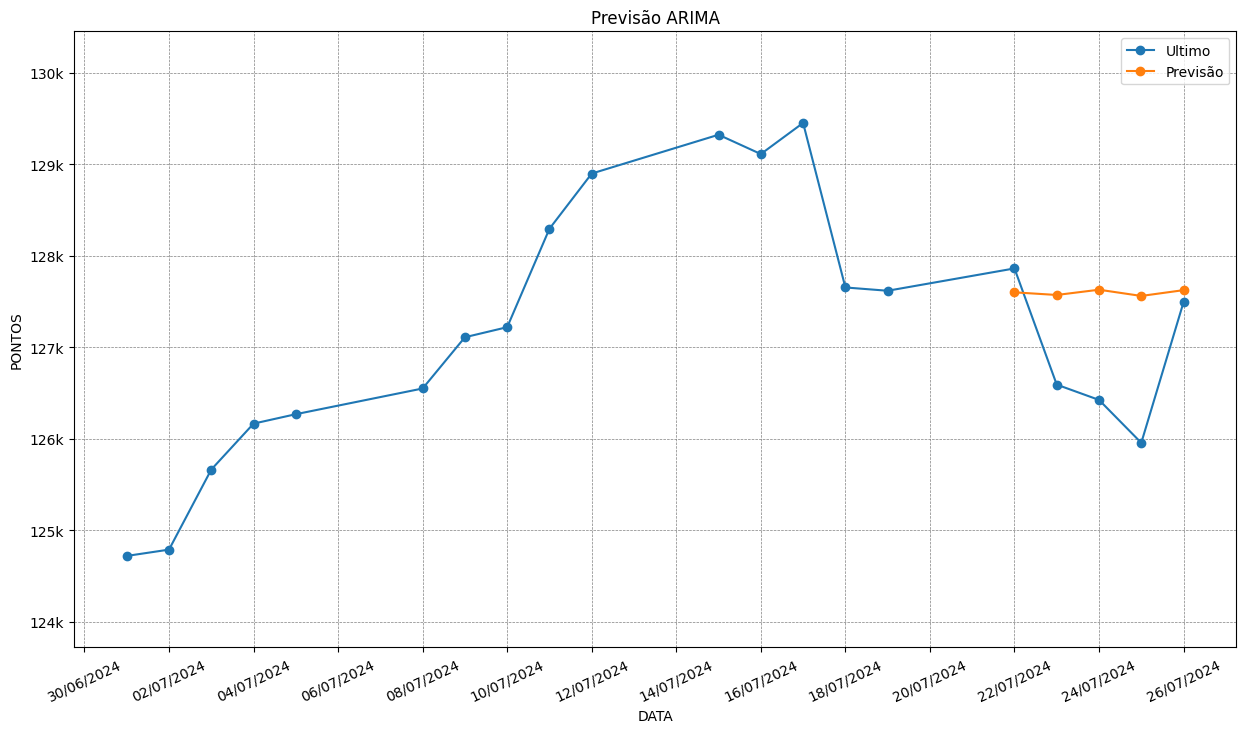

In [23]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(arima_forecast_df['ds'], arima_forecast_df['y'], marker='o', label='Ultimo')
ax.plot(arima_forecast_df['ds'], arima_forecast_df['previsao'], marker='o', label='Previsão')

ax.legend()
ax.set_xlabel('DATA')
ax.set_ylabel('PONTOS')
ax.set_title('Previsão ARIMA')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Configuração eixo X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Configuração eixo Y
ax.yaxis.set_major_locator(MultipleLocator(1e3))
ax.yaxis.set_major_formatter(FuncFormatter(converter_para_milhar))
ax.set_ylim(arima_forecast_df['y'].min() - 1e3, arima_forecast_df['y'].max() + 1e3)

plt.xticks(rotation=25)
plt.show()

**Modelo Prophet**

Obs.: Ao contrário do ARIMA, para o modelo Prophet foi necessário reduzir o número de dias para o treinamento. Com um conjunto de dados muito grande, o Prophet tendia a prever valores muito menores do que os reais, enquanto com um conjunto de dados muito pequeno, as previsões eram muito maiores.

In [24]:
from prophet import Prophet

prophet_model = Prophet(daily_seasonality=True)
treino = df_novo.loc[(df_novo['ds'] >= '2023-11-01') & (df_novo['ds'] <= '2024-07-21')]
prophet_model.fit(treino)

data = pd.date_range(start=teste['ds'].min(), end=teste['ds'].max(), freq='B')
prophet_future_df = pd.DataFrame({ 'ds': data })
prophet_forecast_df = prophet_model.predict(prophet_future_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fj37b3/4q_jkws4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fj37b3/7w1av_wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33447', 'data', 'file=/tmp/tmp83fj37b3/4q_jkws4.json', 'init=/tmp/tmp83fj37b3/7w1av_wi.json', 'output', 'file=/tmp/tmp83fj37b3/prophet_modelqpf4yo_l/prophet_model-20240729112102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Metricas do Prophet**

In [25]:
metrics_prophet = calculate_metrics(teste['y'], prophet_forecast_df['yhat'])

print("Metricas Prophet:")
print_metrics(metrics_prophet)

Metricas Prophet:
MAE: 681.48
MSE: 762566.75
MAPE: 0.54


**Criação do dataframe para apresentar o mês de julho com o valor real e a previsão do modelo Prophet**

In [26]:
prophet_forecast_df = df_novo.loc[df_novo['ds'] >= '2024-07-01'].merge(prophet_forecast_df, how='left')
prophet_forecast_df[['ds', 'y', 'yhat']].tail()

,ds,y,yhat
15,2024-07-22,127860,126300.864728
16,2024-07-23,126590,126720.274090
17,2024-07-24,126423,126497.084145
18,2024-07-25,125954,126711.851549
19,2024-07-26,127492,126605.923149


**Gráfico apresentando os valores reais e o previsto pelo modelo Prophet**

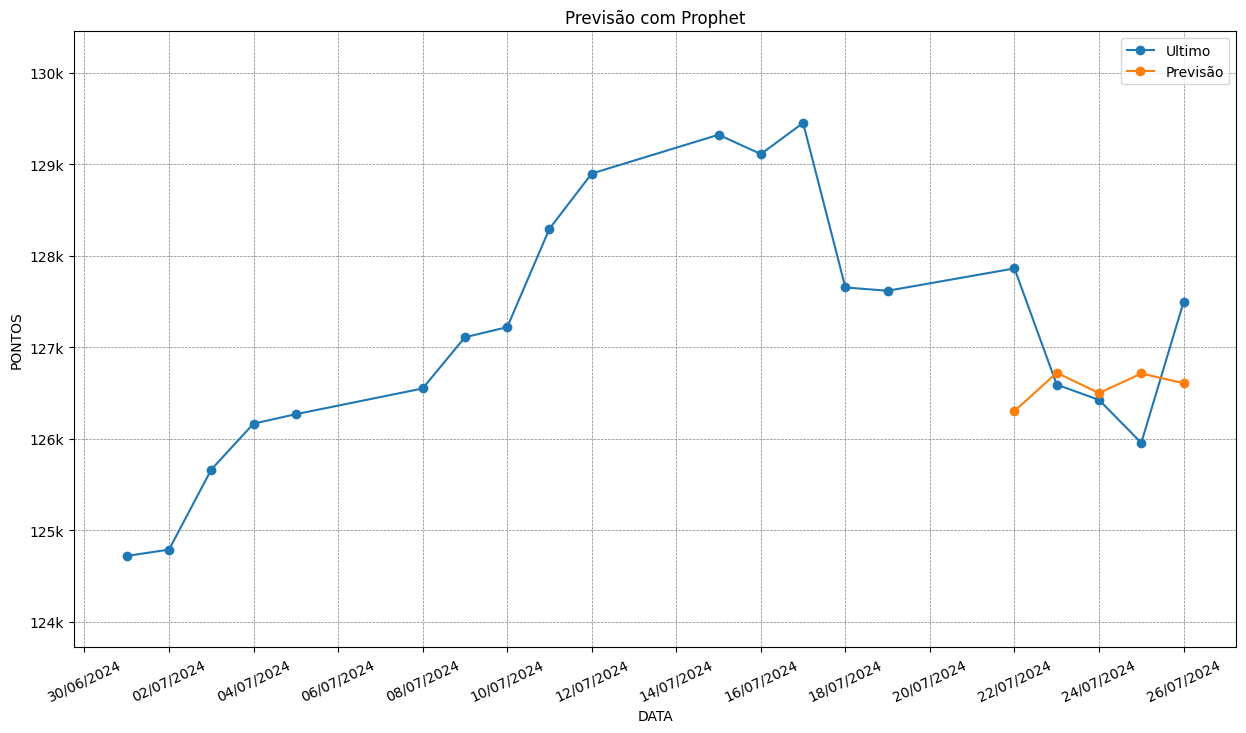

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(prophet_forecast_df['ds'], prophet_forecast_df['y'], marker='o', label='Ultimo')
ax.plot(prophet_forecast_df['ds'], prophet_forecast_df['yhat'], marker='o', label='Previsão')

ax.legend()
ax.set_xlabel('DATA')
ax.set_ylabel('PONTOS')
ax.set_title('Previsão com Prophet')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Configuração eixo X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Configuração eixo Y
ax.yaxis.set_major_locator(MultipleLocator(1e3))
ax.yaxis.set_major_formatter(FuncFormatter(converter_para_milhar))
ax.set_ylim(prophet_forecast_df['y'].min() - 1e3, prophet_forecast_df['y'].max() + 1e3)

plt.xticks(rotation=25)
plt.show()

**Tabela com as métricas dos modelos**

* **MAE (Erro Absoluto Médio):** Média dos erros absolutos entre previsões e valores reais. Menor MAE indica previsões mais precisas.
* **MSE (Erro Quadrático Médio):** Média dos erros quadrados entre previsões e valores reais. Penaliza mais erros grandes; menor MSE indica melhor acurácia.
* **MAPE (Erro Percentual Absoluto Médio):** Média dos erros percentuais absolutos. Expressa o erro como uma porcentagem dos valores reais; menor MAPE indica previsões mais próximas dos valores reais.

In [28]:
mae_arima, mse_arima, mape_arima = metrics_arima;
mae_prophet, mse_prophet, mape_prophet = metrics_prophet

df_metricas = pd.DataFrame({
    'Modelo': ['Prophet', 'ARIMA'],
    'MAE': [mae_prophet, mae_arima],
    'MSE': [mse_prophet, mse_arima],
    'MAPE': [mape_prophet, mape_arima]
})

df_metricas.head()

,Modelo,MAE,MSE,MAPE
0,Prophet,681.48,762566.75,0.54
1,ARIMA,836.32,1014631.17,0.66


**Conclusão**

O modelo Prophet é a melhor escolha, pois apresentou métricas superiores em comparação com o ARIMA. Além disso, o Prophet necessitou de apenas 9 meses de dados para o treinamento (de novembro/2023 a julho/2024), enquanto o ARIMA exigiu um período muito mais extenso, de janeiro/2010 a julho/2024.
